In [1]:
# import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Input,Dense
from keras_tuner.tuners import RandomSearch

Using TensorFlow backend


## Load the dataset

In [2]:
df=pd.read_csv(r'F:\Deep Learning Assignments\Project-1\milknew.csv')

In [3]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [5]:
# renaming the column
df = df.rename(columns={'Fat ':'Fat'})

In [6]:
# Converting test category into numerical, using mapping such as low - 0, medium - 1 and high - 2
df['Grade'] = df['Grade'].map({'high':2, 'medium':1 ,'low':0})
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,1
1055,6.7,38,1,0,1,0,255,2
1056,3.0,40,1,1,1,1,255,0
1057,6.8,43,1,0,1,0,250,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 66.3 KB


In [8]:
# Split into features and target
X = df.drop('Grade', axis=1)
y = df['Grade']

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train.shape

(847, 7)

In [11]:
y_train.shape

(847,)

In [12]:
X_test.shape

(212, 7)

In [13]:
y_test.shape

(212,)

In [14]:
X_train.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
331,6.8,40,1,0,1,0,245
44,6.6,45,0,0,0,1,250
307,6.8,45,1,1,1,0,245
323,9.0,43,1,0,1,1,250
1009,9.0,43,1,0,1,1,250


## Balancing the Data

In [15]:
y_train.value_counts()

0    351
1    288
2    208
Name: Grade, dtype: int64

In [16]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()  

X_train, y_train = smote.fit_resample(X_train, y_train)

In [17]:
y_train.value_counts()

1    351
2    351
0    351
Name: Grade, dtype: int64

## Data Preprocessing

In [18]:
st=StandardScaler()

In [26]:
# standardizing the numerical data
X_trains=pd.DataFrame(st.fit_transform(X_train),
                    columns=X_train.columns,
                      index=X_train.index)
X_trains.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,0.132518,-0.359604,0.897872,-0.918767,0.635610,-0.999051,-1.627854
1,-0.024460,0.192061,-1.113744,-0.918767,-1.573292,1.000950,-0.449109
2,0.132518,0.192061,0.897872,1.088415,0.635610,-0.999051,-1.627854
3,1.859271,-0.028605,0.897872,-0.918767,0.635610,1.000950,-0.449109
4,1.859271,-0.028605,0.897872,-0.918767,0.635610,1.000950,-0.449109


In [27]:
# standardizing the numerical data
X_tests=pd.DataFrame(st.fit_transform(X_test),
                    columns=X_test.columns,
                      index=X_test.index)
X_tests.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
576,-0.049506,-0.441856,0.89253,-0.850633,0.778499,1.068370,0.739487
312,-1.646626,1.345807,-1.12041,1.175595,0.778499,1.068370,-0.380308
70,1.775773,-0.173707,0.89253,-0.850633,0.778499,1.068370,-0.380308
682,0.102600,0.005059,-1.12041,-0.850633,-1.284523,1.068370,0.739487
896,-0.049506,-0.620623,-1.12041,-0.850633,-1.284523,-0.936005,0.739487


## Building the Logical Structure

In [28]:
from keras.initializers import Zeros,Ones,glorot_normal,glorot_uniform,he_normal,he_uniform,random_uniform,random_normal 

In [29]:
# Define the function to build the model for Keras Tuner
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_trains.shape[1],)))
    
    for i in range(hp.Int("hiddenlayers", min_value=5, max_value=10)):
        model.add(Dense(units=hp.Int("neurons{}".format(i), min_value=1, max_value=15),
                        activation=hp.Choice("activation", values=["sigmoid", "tanh", "relu"]),
                        kernel_initializer=hp.Choice("weight_init", values=["glorot_uniform", "glorot_normal", "he_uniform", "he_normal"])))

    model.add(Dense(3, activation='softmax'))  # Adjusted for three classes
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [33]:
# Instantiate the tuner and perform hyperparameter tuning
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory=r'F:\Deep Learning Assignments\Project-1\models',
    project_name="list_of_models"
)

In [34]:
tuner.search(X_trains, y_train, epochs=15, validation_data=(X_tests, y_test))

Trial 5 Complete [00h 00m 04s]
val_accuracy: 0.40566039085388184

Best val_accuracy So Far: 0.9103773832321167
Total elapsed time: 00h 00m 26s


In [35]:
tuner.search_space_summary()

Search space summary
Default search space size: 13
hiddenlayers (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
neurons0 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 15, 'step': 1, 'sampling': 'linear'}
activation (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'tanh', 'relu'], 'ordered': False}
weight_init (Choice)
{'default': 'glorot_uniform', 'conditions': [], 'values': ['glorot_uniform', 'glorot_normal', 'he_uniform', 'he_normal'], 'ordered': False}
neurons1 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 15, 'step': 1, 'sampling': 'linear'}
neurons2 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 15, 'step': 1, 'sampling': 'linear'}
neurons3 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 15, 'step': 1, 'sampling': 'linear'}
neurons4 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 1

In [36]:
tuner.results_summary()

Results summary
Results in F:\Deep Learning Assignments\Project-1\models\list_of_models
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 3 summary
Hyperparameters:
hiddenlayers: 7
neurons0: 4
activation: relu
weight_init: glorot_normal
neurons1: 10
neurons2: 4
neurons3: 6
neurons4: 8
neurons5: 4
neurons6: 5
neurons7: 1
neurons8: 8
neurons9: 5
Score: 0.9103773832321167

Trial 2 summary
Hyperparameters:
hiddenlayers: 7
neurons0: 6
activation: tanh
weight_init: glorot_normal
neurons1: 9
neurons2: 4
neurons3: 10
neurons4: 8
neurons5: 3
neurons6: 7
neurons7: 15
neurons8: 6
neurons9: 11
Score: 0.8113207817077637

Trial 1 summary
Hyperparameters:
hiddenlayers: 9
neurons0: 2
activation: tanh
weight_init: he_normal
neurons1: 8
neurons2: 3
neurons3: 4
neurons4: 10
neurons5: 10
neurons6: 14
neurons7: 3
neurons8: 9
neurons9: 5
Score: 0.6698113083839417

Trial 4 summary
Hyperparameters:
hiddenlayers: 9
neurons0: 7
activation: sigmoid
weight_init: glorot_uniform
neurons1

In [37]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters and train it on the full dataset
model = tuner.hypermodel.build(best_hps)

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 4)                 32        
                                                                 
 dense_11 (Dense)            (None, 10)                50        
                                                                 
 dense_12 (Dense)            (None, 4)                 44        
                                                                 
 dense_13 (Dense)            (None, 6)                 30        
                                                                 
 dense_14 (Dense)            (None, 8)                 56        
                                                                 
 dense_15 (Dense)            (None, 4)                 36        
                                                                 
 dense_16 (Dense)            (None, 5)                

In [39]:
hist=model.fit(X_trains,y_train,batch_size=10,epochs=10,validation_split=0.1)

Epoch 1/10
95/95 [==============================] - 2s 4ms/step - loss: 1.0790 - accuracy: 0.3601 - val_loss: 1.1392 - val_accuracy: 0.0000e+00
Epoch 2/10
95/95 [==============================] - 0s 2ms/step - loss: 0.9290 - accuracy: 0.5206 - val_loss: 1.0524 - val_accuracy: 0.0000e+00
Epoch 3/10
95/95 [==============================] - 0s 2ms/step - loss: 0.6787 - accuracy: 0.8152 - val_loss: 0.5908 - val_accuracy: 0.6981
Epoch 4/10
95/95 [==============================] - 0s 2ms/step - loss: 0.4954 - accuracy: 0.8870 - val_loss: 0.4545 - val_accuracy: 0.6981
Epoch 5/10
95/95 [==============================] - 0s 2ms/step - loss: 0.3889 - accuracy: 0.8976 - val_loss: 0.3347 - val_accuracy: 0.8396
Epoch 6/10
95/95 [==============================] - 0s 2ms/step - loss: 0.3082 - accuracy: 0.9029 - val_loss: 0.3009 - val_accuracy: 0.8396
Epoch 7/10
95/95 [==============================] - 0s 2ms/step - loss: 0.2447 - accuracy: 0.9303 - val_loss: 0.2448 - val_accuracy: 0.9811
Epoch 8/10
9

In [40]:
import matplotlib.pyplot as plt

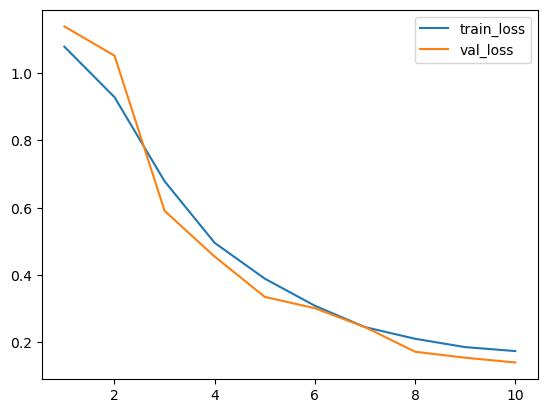

In [41]:
plt.plot(range(1,11),hist.history["loss"],label="train_loss")
plt.plot(range(1,11),hist.history["val_loss"],label="val_loss")
plt.legend()

## Evaluation of the Model

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_tests)

# Convert predicted probabilities to class labels
y_pred_classes = y_pred.argmax(axis=-1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


7/7 [==============================] - 0s 3ms/step
Accuracy: 0.9198113207547169
Precision: 0.930672062187892
Recall: 0.9198113207547169
F1 Score: 0.9221837575300041


In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

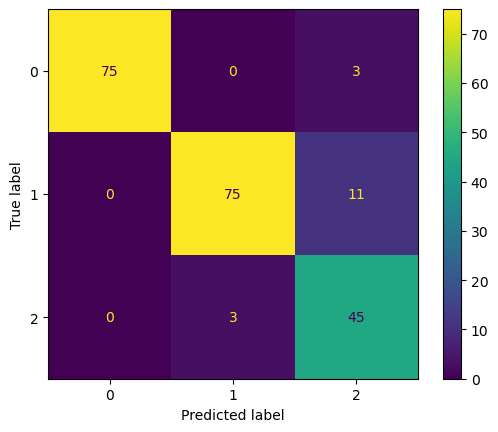

In [44]:
cm = confusion_matrix(y_test,y_pred_classes)
va = ConfusionMatrixDisplay(cm)
va.plot()
plt.show()